In order to further improve our model, it is time to add even more data to our model! 

In [36]:
import pandas as pd
from itertools import tee
import warnings
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from   sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

In [37]:
avg_income = pd.read_excel("..\\data\\washington_state_income_by_zipcode.xlsx", usecols = ["Zip Code", "Location", "City", "Population", "Avg. Income/H/hold", "National Rank"])
avg_income.drop(index = [100, 201, 302, 403, 504], inplace = True)

In [38]:
avg_income.rename(columns = {'Zip Code': 'zipcode'}, inplace = True)

In [39]:
avg_income.head(5)

,zipcode,Location,City,Population,Avg. Income/H/hold,National Rank
0,98039,"47.626035, -122.233707","Medina, Washington",3050,132665,#46
1,98053,"47.655058, -122.025817","Redmond, Washington",31203,96028,#335
2,98364,"47.855439, -122.595728","Port Gamble, Washington",102,94366,#364
3,98040,"47.562356, -122.226514","Mercer Island, Washington",22036,91904,#415
4,98029,"47.578444, -122.013924","Issaquah, Washington",28427,91146,#430


In [40]:
avg_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 566
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   zipcode             562 non-null    object
 1   Location            562 non-null    object
 2   City                562 non-null    object
 3   Population          562 non-null    object
 4   Avg. Income/H/hold  562 non-null    object
 5   National Rank       562 non-null    object
dtypes: object(6)
memory usage: 30.7+ KB


In [41]:
avg_income["zipcode"] = avg_income["zipcode"].astype("int")

In [42]:
['Population', "Avg. Income/H/hold", "National Rank"]

['Population', 'Avg. Income/H/hold', 'National Rank']

In [43]:
avg_income['Population'] = avg_income['Population'].astype('int')

In [44]:
avg_income['Avg. Income/H/hold'] =  avg_income['Avg. Income/H/hold'].astype('int')

In [45]:
import re
avg_income['National Rank'] = avg_income['National Rank'].apply(lambda x: int(re.sub(r'[^\w\s]', '', x)))

In [46]:
avg_income['Location'] = avg_income['Location'].apply(lambda x: x[:9] + ',' +  x[11:])

In [47]:
incomes = []

for income in avg_income["Location"]:
    incomes.append((float(income[:8]), float(income[11:])))
    
for income, index in zip(incomes, range(len(avg_income['Location']))):
        avg_income['Location'][index] = income 

In [48]:
type(avg_income.Location[0])

tuple

In [49]:
homes = pd.read_excel("..\\data\\king_county_home_sales.xlsx", index_col = "Unnamed: 0")


In [50]:
homes.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,sqft_lot15,renovated,view_ord,condition_ord,grade_ord,age,point,distance_to_starbucks_miles,distance_to_amazon_miles,distance_to_needle_miles
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,1180,...,5650,0,0,2,4,60,"(47.5112, -122.257)",6.041009,8.552873,8.697321
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,2170,...,7639,1,0,2,4,64,"(47.5112, -122.257)",6.041009,8.552873,8.697321


In [51]:
homes.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'view_ord', 'condition_ord', 'grade_ord',
       'age', 'point', 'distance_to_starbucks_miles',
       'distance_to_amazon_miles', 'distance_to_needle_miles'],
      dtype='object')

In [52]:
homes_and_income = homes.merge(avg_income, on = "zipcode")

In [53]:
homes_and_income.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'view_ord', 'condition_ord', 'grade_ord',
       'age', 'point', 'distance_to_starbucks_miles',
       'distance_to_amazon_miles', 'distance_to_needle_miles', 'Location',
       'City', 'Population', 'Avg. Income/H/hold', 'National Rank'],
      dtype='object')

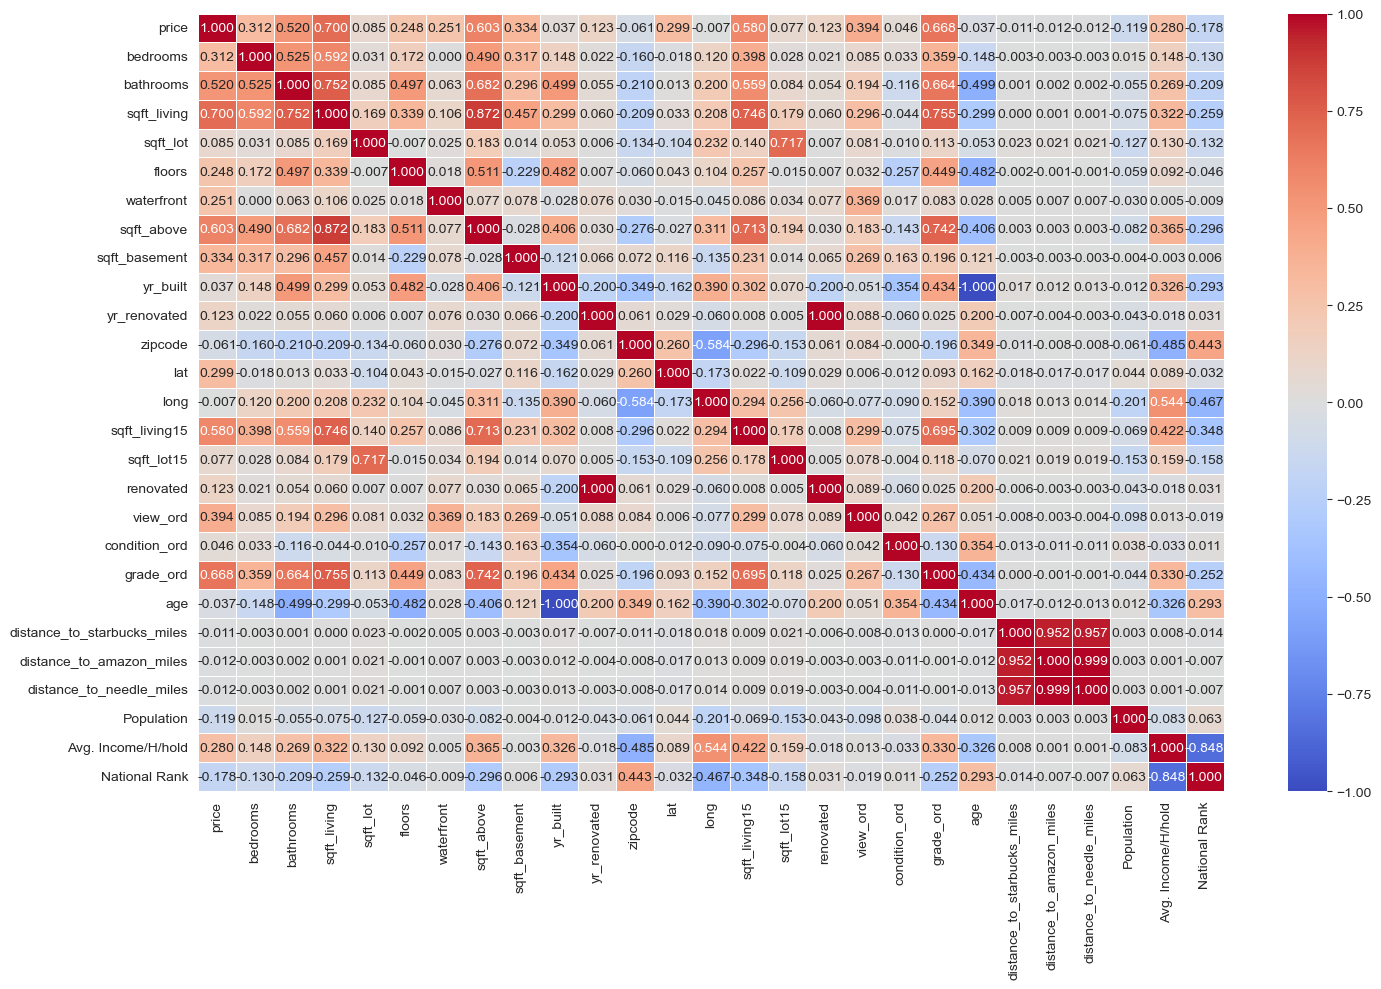

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(homes_and_income.drop(columns = "id").corr(), center = 0, cmap = "coolwarm", annot=True, linewidths=.5, fmt = ".03f", ax=ax)

plt.tight_layout()


In [55]:
dummy_zip = pd.get_dummies(homes_and_income['zipcode'], drop_first = True)

In [56]:
features = homes_and_income[['bedrooms', 'bathrooms', 'sqft_living',
                 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'lat', 'long',
                 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'view_ord', 'condition_ord', 'grade_ord', 
                 'age', "renovated", "distance_to_amazon_miles", 'Population', 'Avg. Income/H/hold', 'National Rank']]

In [57]:
features = features.join(dummy_zip)

In [58]:
X, y = features, homes_and_income[['price']]

# Generate train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)


# Init, fit, score
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

print(f"Training score: {multi_model.score(X_train, y_train)}")
multi_model_score = multi_model.score(X_test, y_test)
print(f"Test score: {multi_model.score(X_test, y_test)}")

Training score: 0.8034708611768964
Test score: 0.8098226817203398


In [59]:
def correlated_column_names(df, target, threshold):
    # this function returns the a list of the names of columns with greater than a certain threshold of correlation. 
    index_columns = df.corr()[target][(df.corr()[target] >= threshold) & (df.corr()[target] != 1) ].index # this gets an index object
    columns = [index for index in index_columns] # this creates a list with column names 
    return(columns)


features = homes_and_income[correlated_column_names(homes_and_income, 'price', .1 )]
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15',
       'renovated', 'view_ord', 'grade_ord', 'Avg. Income/H/hold'],
      dtype='object')

In [60]:
features = features.join(dummy_zip)

In [61]:
X, y = features, homes_and_income[['price']]

# Generate train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42
)


# Init, fit, score
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

print(f"Training score: {multi_model.score(X_train, y_train)}")
multi_model_score = multi_model.score(X_test, y_test)
print(f"Test score: {multi_model.score(X_test, y_test)}")

Training score: 0.7996814534053419
Test score: 0.8045094741527161


# Now its time to do the dependencies of our new dataset

In [62]:
#list(homes_and_income.loc[homes_and_income.price > 5000000].index.values)
homes_and_income.drop(index = list(homes_and_income.loc[homes_and_income.price > 5000000].index.values), inplace = True)

In [63]:
y = homes_and_income['price']
X = homes_and_income[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15',
       'renovated', 'view_ord', 'grade_ord', 'Avg. Income/H/hold']]


linear_with_interaction = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

X_transformed = linear_with_interaction.fit_transform(X)

feat_names = pd.Series(linear_with_interaction.get_feature_names())

feat_names

0           x0
1           x1
2           x2
3           x3
4           x4
        ...   
100    x10 x12
101    x10 x13
102    x11 x12
103    x11 x13
104    x12 x13
Length: 105, dtype: object

In [64]:
xs = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',  'x11', 'x12', 'x13']

columns = X.columns

map_dict = {x:y for x,y in zip(xs, columns)}

for key, value in map_dict.items():
    feat_names = feat_names.str.replace(key, value)


income_trans = pd.DataFrame(X_transformed)

income_trans.columns = feat_names

income_trans = income_trans.join(dummy_zip)

In [65]:
# Generate train/test sets

X_train, X_test, y_train, y_test = train_test_split(
    income_trans, y, test_size=.3, random_state=42
)


# Init, fit, score
interactions_model = LinearRegression()
interactions_model.fit(X_train, y_train)

print(f"Training score: {interactions_model.score(X_train, y_train)}")

print(f"Testing score: {interactions_model.score(X_test, y_test)}")

interactions_model_score  = interactions_model.score(X_test, y_test)

Training score: 0.863540823091338
Testing score: 0.8503116061111226


# Now its time to visualize our beautiful result!

In [66]:
X = income_trans
y = homes_and_income['price']
y_pred = interactions_model.predict(income_trans)

fig = px.scatter(x=y, y=y_pred, labels={'x': 'True Sales Price', 'y': 'Predicted Sales Price'}, title = f"Multi-Regression Model to Predict Home Sale Price in King County: R^2 = {interactions_model_score:.05f}")
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)

fig.show()

In [67]:
# colors = ['Positive' if c > 0 else 'Negative' for c in interactions_model.coef_[160:170]]
#
# fig = px.bar(
#     x=income_trans.columns[], y=interactions_model.coef_[:-10], color=colors,
#     color_discrete_sequence=['red', 'blue'],
#     labels=dict(x='Feature', y='Linear coefficient'),
#     title='Weight of each feature for predicting petal width'
# )
# fig.show()

# Splitting our Data to see how budget tier effects our R^2 Score

In [68]:
low = homes_and_income.loc[homes_and_income.price <= 1000000]

# mid = homes_and_income.loc[(homes_and_income.price > 2000000) & (homes_and_income.price <= 4000000) ]

high = homes_and_income.loc[(homes_and_income.price > 1000000) ]

In [69]:
home_groups = [low, high]

In [70]:
for tier in home_groups:
    y = tier['price']
    X = tier[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
                          'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'sqft_living15',
                          'renovated', 'view_ord', 'grade_ord', 'Avg. Income/H/hold']]


    linear_with_interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

    X_transformed = linear_with_interaction.fit_transform(X)

    feat_names = pd.Series(linear_with_interaction.get_feature_names())

    feat_names
    xs = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

    columns = X.columns

    map_dict = {x: y for x, y in zip(xs, columns)}

    for key, value in map_dict.items():
        feat_names = feat_names.str.replace(key, value)

    income_trans = pd.DataFrame(X_transformed)

    income_trans.columns = feat_names

    income_trans = income_trans.join(dummy_zip)
    # Generate train/test sets

    X_train, X_test, y_train, y_test = train_test_split(
        income_trans, y, test_size=.3, random_state=42
    )

    # Init, fit, score
    interactions_model = LinearRegression()
    interactions_model.fit(X_train, y_train)

    print(f"Training score: {interactions_model.score(X_train, y_train)}")

    print(f"Testing score: {interactions_model.score(X_test, y_test)}")

    interactions_model_score = interactions_model.score(X_test, y_test)
    # Now its time to visualize our beautiful result!

    X = income_trans
    y = tier['price']
    y_pred = interactions_model.predict(income_trans)

    fig = px.scatter(x=y, y=y_pred, labels={'x': 'ground truth', 'y': 'prediction'},
                     title=f"Multi-Regression Model to Predict Home Sale Price in King County: R^2 = {interactions_model_score:.05f}")
    fig.add_shape(
        type="line", line=dict(dash='dash'),
        x0=y.min(), y0=y.min(),
        x1=y.max(), y1=y.max()
    )

    fig.show()

Training score: 0.7552876524870208
Testing score: 0.7499773619143864


Training score: 0.5865756725088296
Testing score: -4245.646211676377
